# GRAMENER CASE STUDY 
## By Soumik Adak

# Problem Statement

You work for a consumer finance company that specialises in providing various types of loans to urban customers. When the company receives a loan application, it has to decide whether to approve or reject it based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

If the applicant is not likely to repay the loan, i.e., they are likely to default, then approving the loan may lead to financial loss for the company.

 

The data given below contains information about past loan applicants and whether they ‘defaulted’. The aim is to identify patterns indicating that a person is likely to default, which may be used to deny the loan, reduce the loan amount, lend (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of defaulting.

The following image depicts the decisions that could be undertaken by the firm.

# Business Objectives

This company is the largest online loan marketplace facilitating personal loans, business loans, and the financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.

 

Like most other lending companies, lending to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or absconds with the money owed. In other words, borrowers who default cause the biggest losses to lenders. In this case, customers labelled as ‘charged-off’ are the ‘defaulters’.

 

If one is able to identify these risky loan applicants, then such loans can be reduced, thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e., the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment. 


To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

## Importing Libraries

In [1024]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1025]:
# Filter out the warnings

import warnings

warnings.filterwarnings('ignore')

## Importing and reading the data

In [1026]:
# lets import the dataset which is given 

loan_data = pd.read_csv("loan.csv")

In [1027]:
# Print the head of the data frame
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [1028]:
# Lets store the data into a backup variable
backup_data = loan_data

## Understanding the data

In [1029]:
# Lets see the information of variables to check their data types.
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [1030]:
# Lets see the no of rows and columns in the dataframe
loan_data.shape

(39717, 111)

In [1031]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [1032]:
# Lets look all the column names
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

## Data Cleaning

Some columns have a large number of missing values, let's first fix the missing values and then check for other types of data quality problems.

In [1033]:
# Summarising the number of missing values in each column
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [1034]:
# Percentage of missing values in each column
(loan_data.isnull().sum()/len(loan_data.index))*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

We can see there are many columns have 100% missing values so first drop that columns.

In [1035]:
# Remove the columns having more than 90% missing values
missibg_value = loan_data.columns[100*(loan_data.isnull().sum()/len(loan_data.index)) > 90]
missibg_value

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [1036]:
# Drop the missing columns
loan = loan_data.drop(missibg_value, axis=1)

In [1037]:
# Check the shape after removing the columns
loan.shape

(39717, 55)

In [1038]:
# Again check the percentage of missing values in each column
(loan.isnull().sum()/len(loan.index))*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


 So we can see there are 2 columns "description" and "months since last delinquent" having approx 32% and 64% missing values

In [1039]:
# So I decided to drop this two columns also
loan = loan.drop(["desc", "mths_since_last_delinq"], axis=1)

In [1040]:
# Lets check the percentage of null values again
(loan.isnull().sum()/len(loan.index))*100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [1041]:
# Check unique values in each column 
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [1042]:
# Delete columns which have only 1 unique value because from this columns we don't get many insights
loan = loan.loc[:, loan.nunique() != 1]

In [1043]:
# Check the shape
loan.shape

(39717, 44)

In [1044]:
# Check the data type of the columns in the dataframe
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [1045]:
# The column term is character type, converting it to int

loan["term"] = loan.term.apply(lambda x: x.split("month")[0])
loan["term"] = loan.term.astype('int64')

In [1046]:
# The column int_rate is character type, converting it to float
loan["int_rate"] = loan.int_rate.apply(lambda x: x.split("%")[0])
loan["int_rate"] = loan.int_rate.astype('float')

In [1047]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  int64  
 6   int_rate                 39717 non-null  float64
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [1048]:
# Extracting the numeric part from the variable employment length

# Droping the missing values from the column 
loan = loan[~loan['emp_length'].isnull()]

# writing a function numeric that will return digits from given string.

def numeric(n):
    string = ""
    for word in n:
        if word.isdigit():
            string = string + word
    return string

# Using numeric function to extract numeric values from the string
loan['emp_length'] = loan['emp_length'].apply(lambda x: numeric(x))

# converting to integer datatype
loan['emp_length'] = loan['emp_length'].astype('int64')

In [1049]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38642 non-null  int64  
 1   member_id                38642 non-null  int64  
 2   loan_amnt                38642 non-null  int64  
 3   funded_amnt              38642 non-null  int64  
 4   funded_amnt_inv          38642 non-null  float64
 5   term                     38642 non-null  int64  
 6   int_rate                 38642 non-null  float64
 7   installment              38642 non-null  float64
 8   grade                    38642 non-null  object 
 9   sub_grade                38642 non-null  object 
 10  emp_title                37202 non-null  object 
 11  emp_length               38642 non-null  int64  
 12  home_ownership           38642 non-null  object 
 13  annual_inc               38642 non-null  float64
 14  verification_status   

## Data Analysis

In [1050]:
# To do Data Analysis we have to remove some columns which are not required
extra_columns = [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d"]

In [1051]:
# let's now remove the extra_columns variables from analysis
loan_data = loan.drop(extra_columns, axis=1)

In [1052]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   member_id             38642 non-null  int64  
 2   loan_amnt             38642 non-null  int64  
 3   funded_amnt           38642 non-null  int64  
 4   funded_amnt_inv       38642 non-null  float64
 5   term                  38642 non-null  int64  
 6   int_rate              38642 non-null  float64
 7   installment           38642 non-null  float64
 8   grade                 38642 non-null  object 
 9   sub_grade             38642 non-null  object 
 10  emp_title             37202 non-null  object 
 11  emp_length            38642 non-null  int64  
 12  home_ownership        38642 non-null  object 
 13  annual_inc            38642 non-null  float64
 14  verification_status   38642 non-null  object 
 15  issue_d            

In [1053]:
# Also zip code, address, state, title columns are not required in the further analysis
loan_data= loan_data.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

In [1054]:
# Change the type of loan_status
loan_data["loan_status"] = loan_data["loan_status"].astype("category")
loan_data["loan_status"].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

So we can see that fully paid comprises most of the loans. The ones marked 'current' means are neither fully paid or not defaulted, so let's get remove the current loans. Also, let's tag the other two values as 0 or 1.

In [1055]:
# filtering only fully paid or charged-off
loan_data = loan_data[loan_data['loan_status'] != 'Current']

# Lets tag 0 or 1
loan_data['loan_status'] = loan_data['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
loan_data['loan_status'] = loan_data['loan_status'].apply(lambda x: pd.to_numeric(x))

# Lets check the value_counts
loan_data['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

In [1056]:
# create a new column for loan to income ratio

loan_data['loan_inc_ratio']= 100*(loan_data['loan_amnt']/loan_data['annual_inc'])
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies,loan_inc_ratio
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,10,RENT,24000.0,Verified,Dec-11,0,credit_card,27.65,0.0,20.833333
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1,RENT,30000.0,Source Verified,Dec-11,1,car,1.00,0.0,8.333333
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,10,RENT,12252.0,Not Verified,Dec-11,0,small_business,8.72,0.0,19.588639
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,10,RENT,49200.0,Source Verified,Dec-11,0,other,20.00,0.0,20.325203
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,3,RENT,36000.0,Source Verified,Dec-11,0,wedding,11.20,0.0,13.888889


In [1057]:
# Extract Year and month from Issue_Date to seperate columns

loan_data['issue_month'],loan_data['issue_year'] = loan_data['issue_d'].str.split('-', 1).str
loan_data['issue_year'] = '20'+ loan_data['issue_year']
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies,loan_inc_ratio,issue_month,issue_year
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,24000.0,Verified,Dec-11,0,credit_card,27.65,0.0,20.833333,Dec,2011
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,30000.0,Source Verified,Dec-11,1,car,1.00,0.0,8.333333,Dec,2011
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,12252.0,Not Verified,Dec-11,0,small_business,8.72,0.0,19.588639,Dec,2011
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,49200.0,Source Verified,Dec-11,0,other,20.00,0.0,20.325203,Dec,2011
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,36000.0,Source Verified,Dec-11,0,wedding,11.20,0.0,13.888889,Dec,2011


In [1058]:
# Get the 25%, 50% and 75% quartiles of the loan_inc_ratio column for categorisation
loan_data["loan_inc_ratio"].quantile([.25, .5, .75])

0.25     9.791131
0.50    16.229051
0.75    25.000000
Name: loan_inc_ratio, dtype: float64

In [1059]:
# Check the default rate
round(np.mean(loan_data["loan_status"])*100, 2)

14.38

The overall default rate is about 14.38%.

In [1060]:
loan_data["int_rate"].quantile([.25, .5, .75])

0.25     8.94
0.50    11.83
0.75    14.42
Name: int_rate, dtype: float64

In [1061]:
loan_data["emp_length"].quantile([.25, .5, .75])

0.25    2.0
0.50    4.0
0.75    9.0
Name: emp_length, dtype: float64

In [1062]:
loan_data["annual_inc"].quantile([.25, .5, .75])

0.25    41000.0
0.50    60000.0
0.75    83000.0
Name: annual_inc, dtype: float64

In [1063]:
loan_data["dti"].quantile([.25, .5, .75])

0.25     8.16
0.50    13.38
0.75    18.55
Name: dti, dtype: float64

In [1064]:
loan_data["loan_amnt"].quantile([.25, .5, .75])

0.25     5500.0
0.50    10000.0
0.75    15000.0
Name: loan_amnt, dtype: float64

## Univariate Analysis

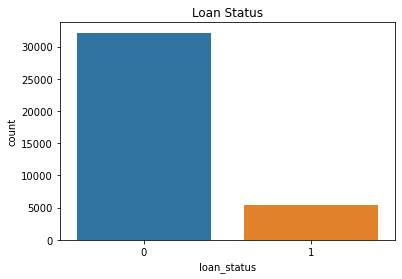

In [1065]:
sns.countplot(data=loan_data, x="loan_status")
plt.title("Loan Status")
plt.show()

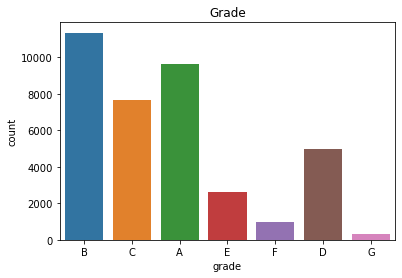

In [1066]:
# Comparing default rates across grade of loan
sns.countplot(data=loan_data, x="grade")
plt.title("Grade")
plt.show()

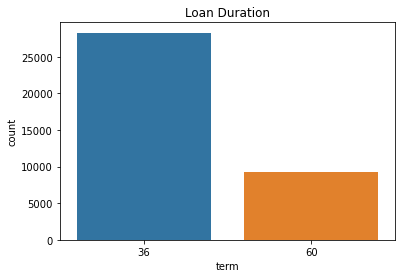

In [1067]:
# Plot default rate across term
sns.countplot(data=loan_data, x="term")
plt.title("Loan Duration")
plt.show()

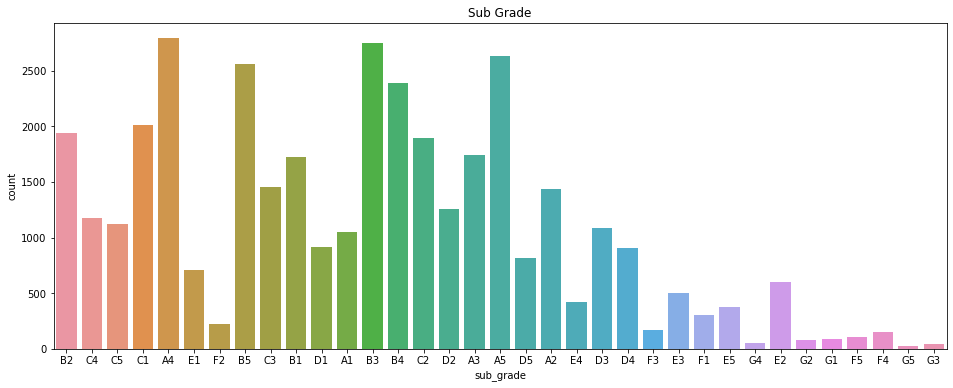

In [1068]:
# plot the subgrades
plt.figure(figsize=(16,6))
sns.countplot(data=loan_data, x="sub_grade")
plt.title("Sub Grade")
plt.show()

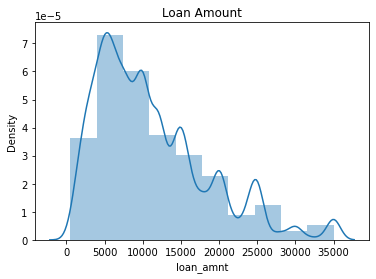

In [1069]:
sns.distplot(loan_data["loan_amnt"], bins=10, kde=True)
plt.title("Loan Amount")
plt.show()

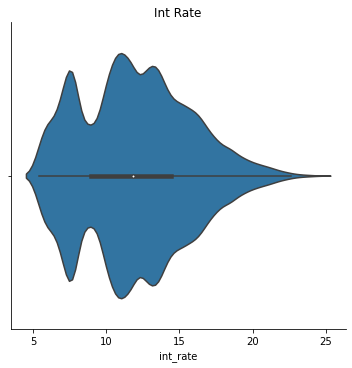

In [1070]:
sns.catplot(data=loan_data, x="int_rate", kind="violin")
plt.title("Int Rate")
plt.show()

sns.histplot(loan_data["annual_inc"], binwidth=3)
plt.title("Annual Income")
plt.show()

## Segmented Univariate Analysis

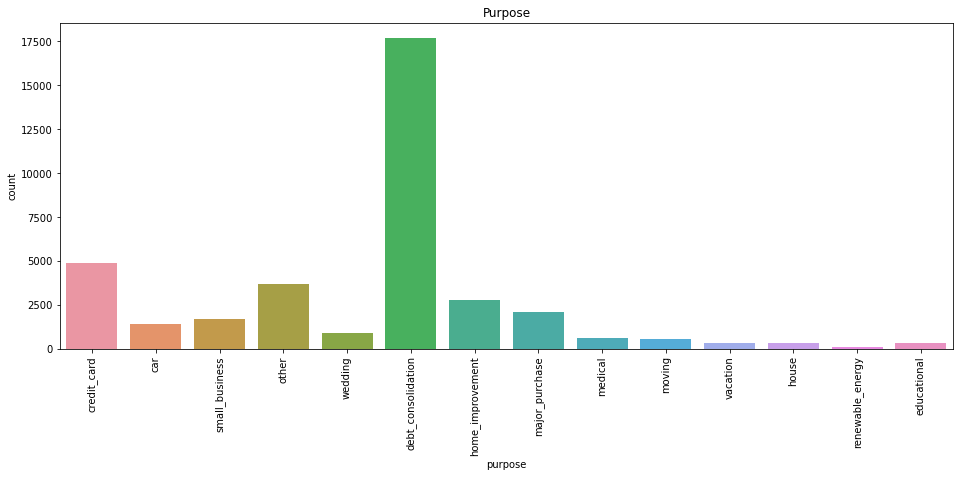

In [1071]:
# Ploting purpose of loans
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
sns.countplot(data=loan_data, x='purpose')
plt.title("Purpose")
plt.show()

Let's analyse the top 4 types of loans based on purpose: debt_consolidation, credit card, home improvement and major purchase.

In [1072]:
# filtering the data for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
loan_data = loan_data[loan_data['purpose'].isin(main_purposes)]
loan_data['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

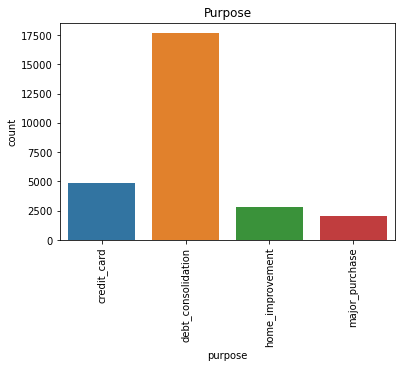

In [1073]:
# Plot number of loans by purpose
sns.countplot(data=loan_data, x="purpose")
plt.title("Purpose")
plt.xticks(rotation=90)
plt.show()

## Bivariate Analysis

In [1074]:
# Defining a function to plot default rate across categorical variables for futher use.
def plot_category(var):
    sns.barplot(data=loan_data, x=var, y='loan_status')
    plt.title("Default Rates Across " + var.title())
    plt.show()

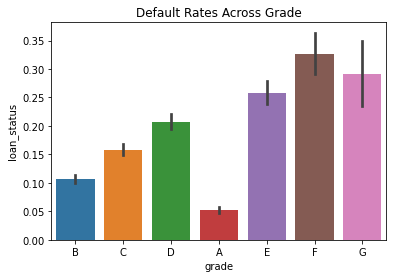

In [1075]:
# Comparing default rates across grade of loan
plot_category('grade')

Here 0 denotes 'Fully Paid' and 1 denotes 'Charged Off' 

Clearly, see that the grade of fully paid loan is higher than charged off and also from A to G, the default rate increases

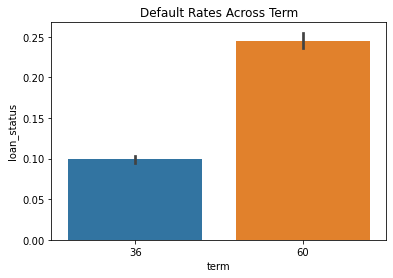

In [1076]:
# Ploting default rates across term 
plot_category('term')

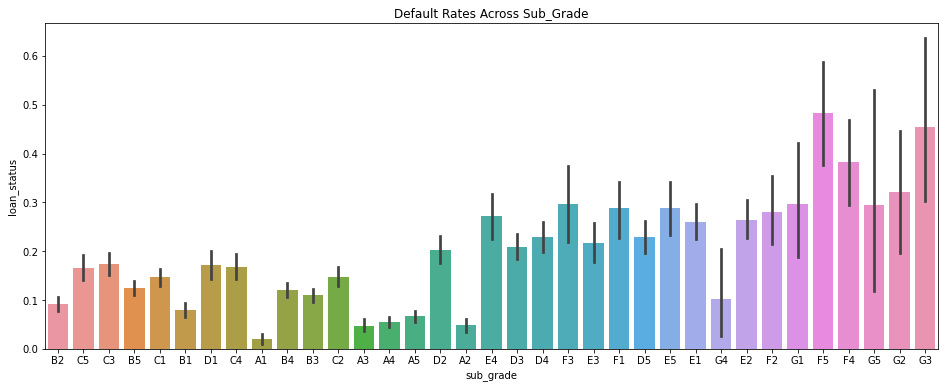

In [1077]:
# subgrades across default rate
plt.figure(figsize=(16, 6))
plot_category('sub_grade')

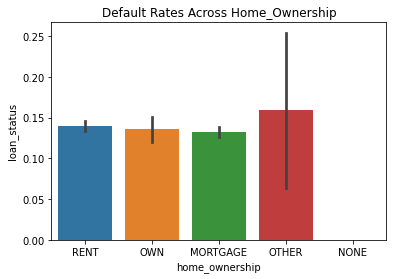

In [1078]:
# Ploting default rates across home ownership 
plot_category('home_ownership')

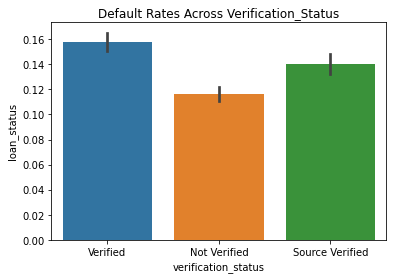

In [1079]:
# Ploting default rates across verification status
plot_category('verification_status')

We can see that verified loans have more default rate as compared to other

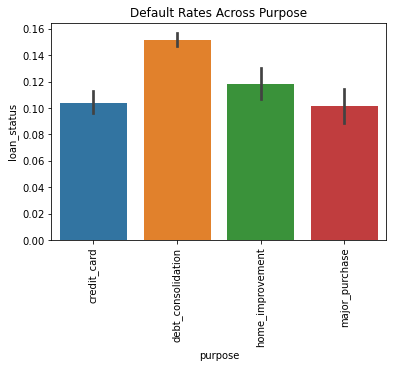

In [1080]:
# ploting purpose of loans across default rate.
plt.xticks(rotation=90)
plot_category('purpose')

In [1081]:
# let's also observe the distribution of loans across years
# first lets convert the year column into datetime and then extract year and month from it
loan_data['issue_d'].head()

0     Dec-11
6     Dec-11
10    Dec-11
11    Dec-11
12    Dec-11
Name: issue_d, dtype: object

In [1082]:
# Convert the issue date to datetime format  
from datetime import datetime
loan_data["issue_d"] = loan_data["issue_d"].apply(lambda x: datetime.strptime(x, '%b-%y'))
loan_data["issue_d"]

0       2011-12-01
6       2011-12-01
10      2011-12-01
11      2011-12-01
12      2011-12-01
           ...    
39711   2007-07-01
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 27439, dtype: datetime64[ns]

In [1083]:
# Extract month and year from issue date
loan_data["month"] = loan_data["issue_d"].apply(lambda x: x.month)
loan_data["year"] = loan_data["issue_d"].apply(lambda x: x.year)

In [1084]:
# let's first observe the number of loans granted across years
loan_data.groupby('year').year.count()

year
2007      148
2008     1053
2009     3121
2010     8210
2011    14907
Name: year, dtype: int64

As expected see that as year increase no of loans increased

In [1085]:
loan_data.groupby('month').month.count()

month
1     1712
2     1662
3     1874
4     1940
5     2062
6     2201
7     2340
8     2410
9     2483
10    2666
11    2919
12    3170
Name: month, dtype: int64

Most loans are granted in December

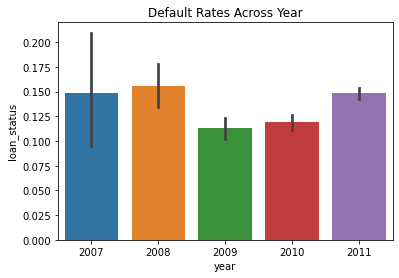

In [1086]:
# lets compare the default rates across years
plot_category('year')

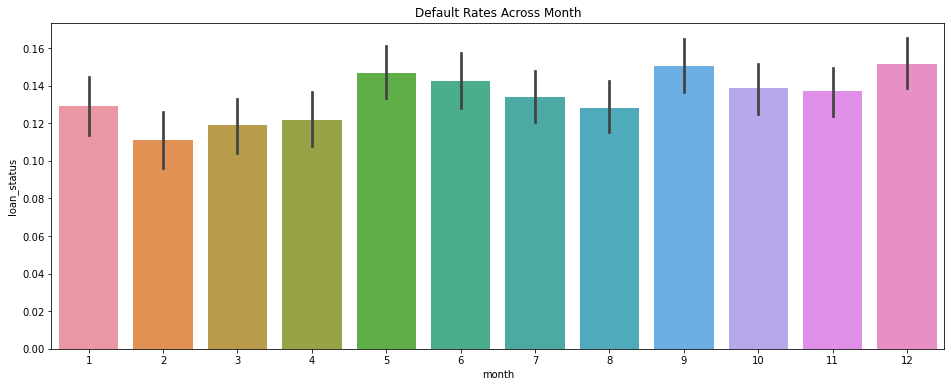

In [1087]:
# comparing default rates across months too 
plt.figure(figsize=(16, 6))
plot_category('month')

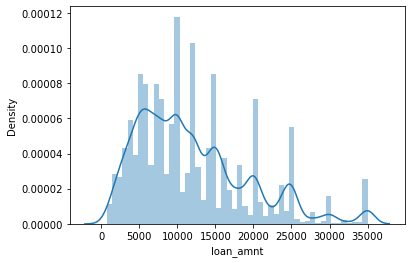

In [1088]:
# let us see loan distribution amount
sns.distplot(loan_data["loan_amnt"])
plt.show()

In [1089]:
# let make a category to better understand
loan_data['loan_amnt'] = pd.cut(loan_data['loan_amnt'], bins=[1, 5000, 15000, 25000, 100000000], labels=['Low', 'Medium', 'High', 'Very High'])

In [1090]:
loan_data["loan_amnt"].value_counts()

Medium       15239
High          5886
Low           5150
Very High     1164
Name: loan_amnt, dtype: int64

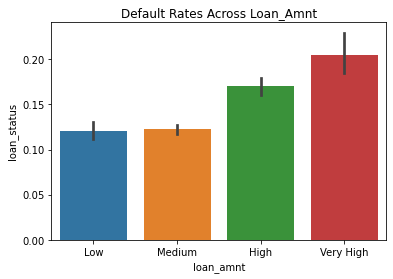

In [1091]:
plot_category('loan_amnt')

In [1092]:
# let's also convert funded amount into category wise
loan_data['funded_amnt_inv'] = pd.cut(loan_data['funded_amnt_inv'], bins=[1, 5000, 15000, 25000, 100000000], labels=['Low', 'Medium', 'High', 'Very High'])

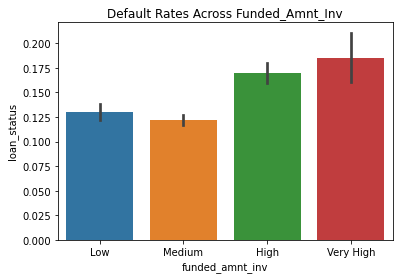

In [1093]:
# ploting funded amount into category wise
plot_category('funded_amnt_inv')

 We can see that the as default rate increase the amount and funded amount increases.

In [1094]:
# lets also categories interest rate 
loan_data['int_rate'] = pd.cut(loan_data['int_rate'], bins=[0.1, 10, 15, 200], labels=['Low', 'Medium', 'High'])

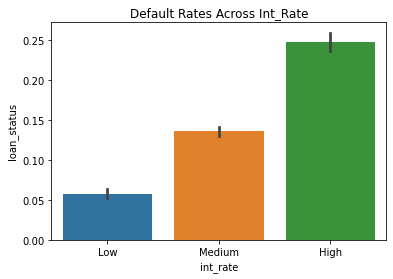

In [1095]:
# ploting default rates across rates of interest
plot_category('int_rate')

As expected the higher default rate has higher interst on it.

In [1096]:
# debt to income ratio
loan_data['dti'] = pd.cut(loan_data['dti'], bins=[0.1, 10, 20, 200], labels=['Low', 'Medium', 'High'])

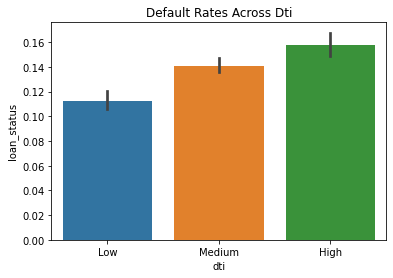

In [1097]:
# ploting default rates across debt to income ratio
plot_category('dti')

In [1098]:
# categorizing funded amount
loan_data['funded_amnt'] = pd.cut(loan_data['funded_amnt'], bins=[0, 5000, 15000, 100000], labels=['Low', 'Medium', 'High'])

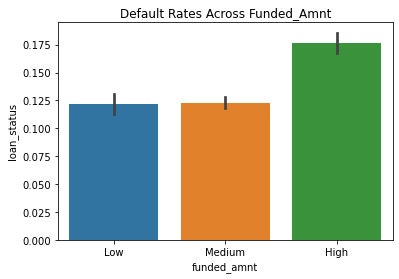

In [1099]:
plot_category('funded_amnt')

In [1100]:
# Categorizing installment
loan_data['installment'] = pd.cut(loan_data['installment'], bins=[0, 200, 400, 600, 5000], labels=['Low', 'Medium', 'High', 'Very High'])

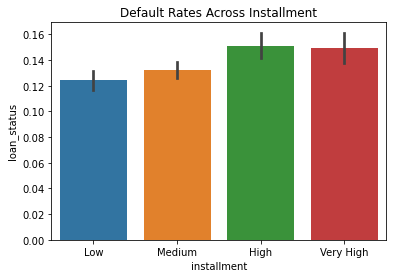

In [1101]:
plot_category('installment')

In [1102]:
# cateorizing annual income
loan_data['annual_inc'] = pd.cut(loan_data['annual_inc'], bins=[0, 50000, 100000, 150000, 20000000], labels=['Low', 'Medium', 'High', 'Very High'])

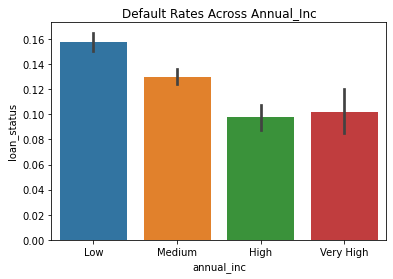

In [1103]:
# Plot annual income across default rate
plot_category('annual_inc')

In [1104]:
# categorizing employment length to fresher, junior, senior, expert

loan_data = loan_data[~loan_data['emp_length'].isnull()]

# binning the variable
loan_data['emp_length'] = pd.cut(loan_data['emp_length'], bins=[0, 1, 3, 7, 100], labels=['Fresher', 'Junior', 'Senior', 'Expert'])

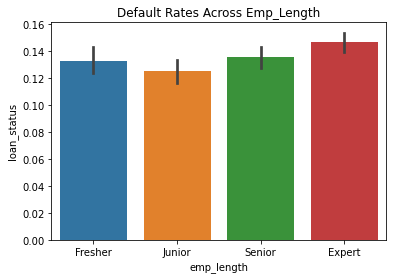

In [1105]:
# Plotting emp lenth and default rate
plot_category('emp_length')

We can see that expert have higher rate and fresher and senior have the same rate

In [1106]:
# loan to income ratio
loan_data['loan_inc_ratio'] = pd.cut(loan_data['loan_inc_ratio'], bins=[0.1, 10, 20, 200], labels=['Low', 'Medium', 'High'])

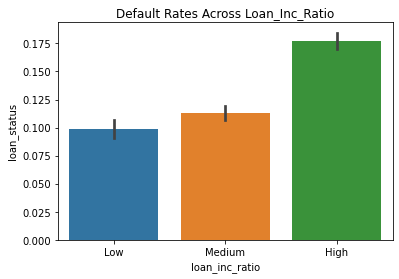

In [1107]:
plot_category('loan_inc_ratio')

## Multivariate Analysis

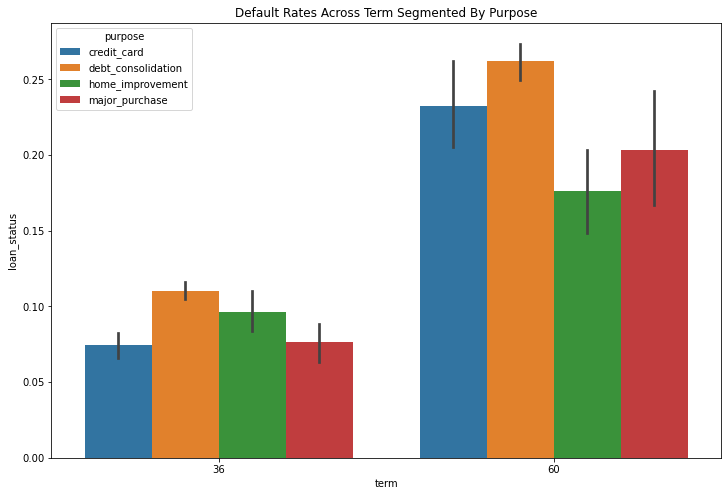

In [1108]:
# comparing the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)

plt.figure(figsize=(12, 8))
plt.title("Default Rates Across Term Segmented By Purpose")
sns.barplot(data=loan_data, x='term', y='loan_status', hue="purpose")
plt.show()

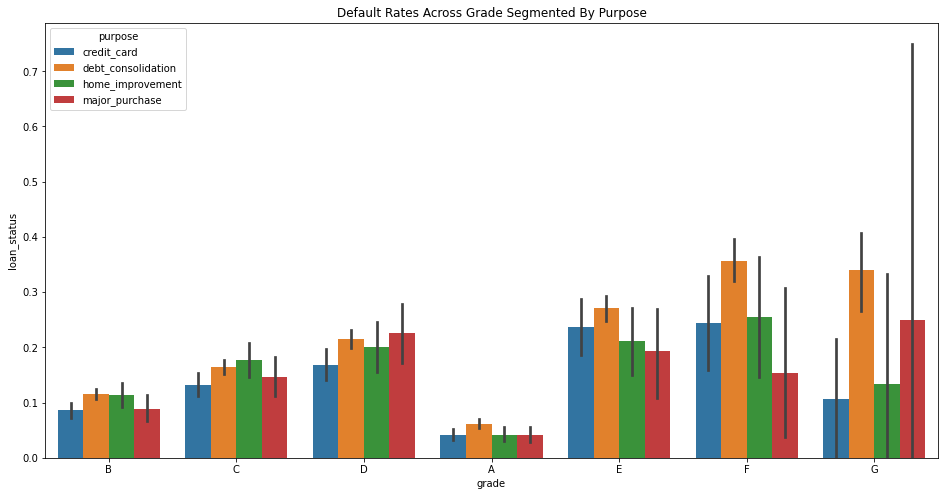

In [1109]:
# Plotting grade of loan vs loan status vs purpose
plt.figure(figsize=(16,8))
plt.title("Default Rates Across Grade Segmented By Purpose")
sns.barplot(data=loan_data, x='grade', y='loan_status', hue="purpose")
plt.show()


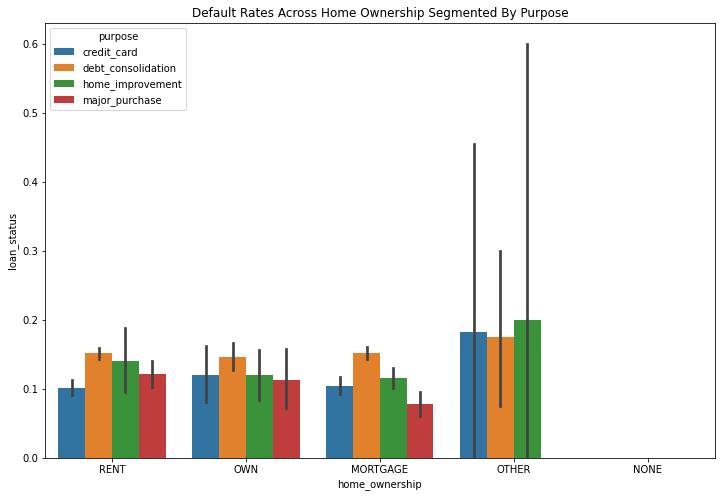

In [1110]:
# Plotting home ownership
plt.figure(figsize=(12,8))
plt.title("Default Rates Across Home Ownership Segmented By Purpose")
sns.barplot(data=loan_data, x='home_ownership', y='loan_status', hue="purpose")
plt.show()

dept_consolidation have high amoung 3 catagory, except others

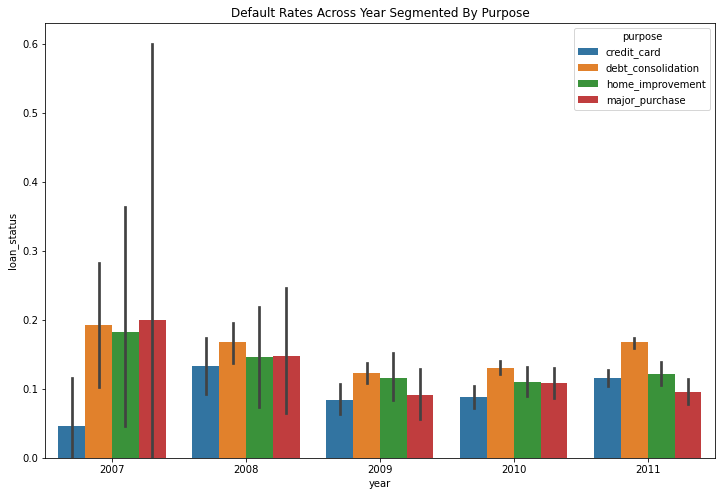

In [1111]:
# ploting default rates across year segmented by purpose.
plt.figure(figsize=(12,8))
plt.title("Default Rates Across Year Segmented By Purpose")
sns.barplot(data=loan_data, x='year', y='loan_status', hue="purpose")
plt.show()

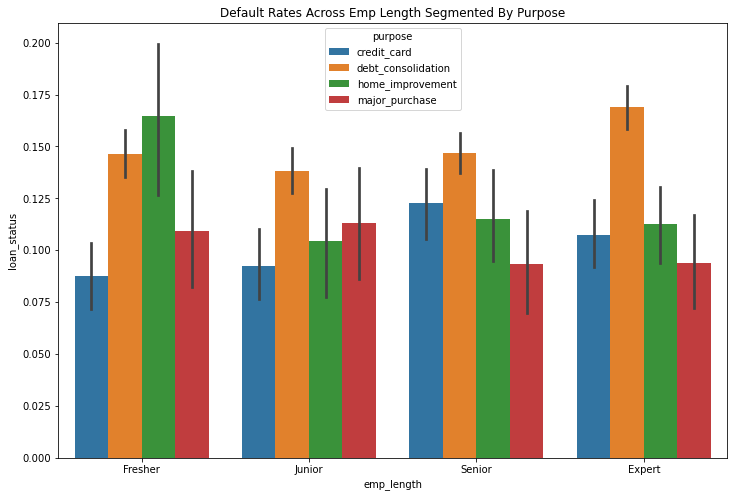

In [1112]:
# ploting default rates across employee length segmented by purpose.
plt.figure(figsize=(12,8))
plt.title("Default Rates Across Emp Length Segmented By Purpose")
sns.barplot(data=loan_data, x='emp_length', y='loan_status', hue="purpose")
plt.show()

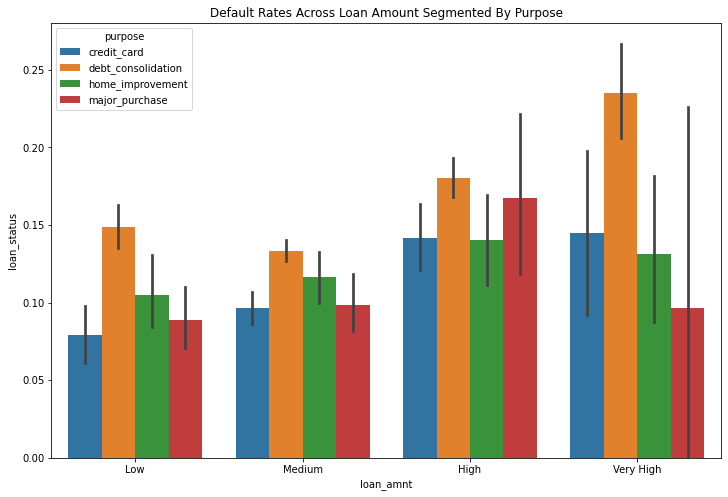

In [1113]:
# ploting default rates across loan amount segmented by purpose.
plt.figure(figsize=(12,8))
plt.title("Default Rates Across Loan Amount Segmented By Purpose")
sns.barplot(data=loan_data, x='loan_amnt', y='loan_status', hue="purpose")
plt.show()

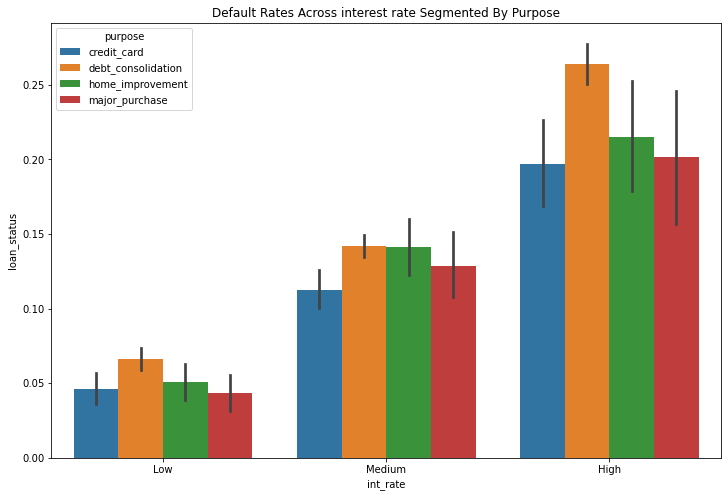

In [1114]:
# ploting default rates across loan amount segmented by purpose.
plt.figure(figsize=(12,8))
plt.title("Default Rates Across interest rate Segmented By Purpose")
sns.barplot(data=loan_data, x='int_rate', y='loan_status', hue="purpose")
plt.show()

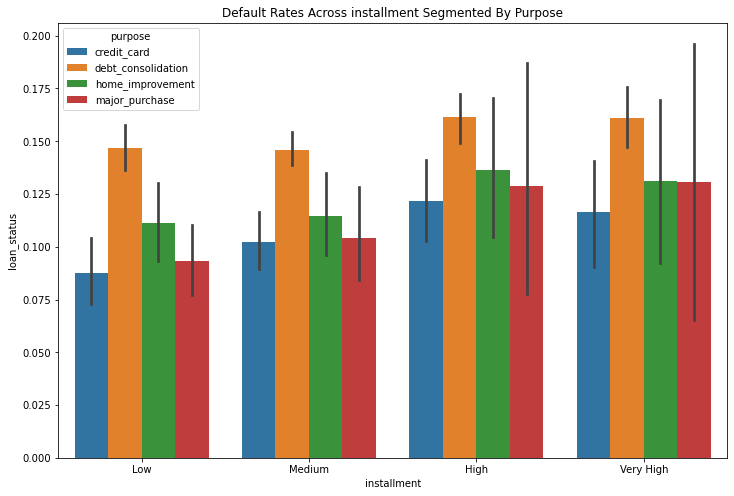

In [1115]:
# ploting default rates across loan amount segmented by purpose.
plt.figure(figsize=(12,8))
plt.title("Default Rates Across installment Segmented By Purpose")
sns.barplot(data=loan_data, x='installment', y='loan_status', hue="purpose")
plt.show()

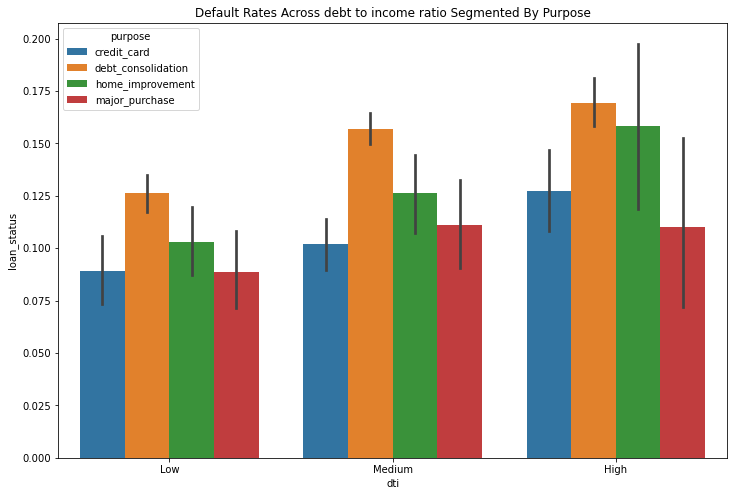

In [1116]:
# ploting default rates across debt to income ratio segmented by purpose.
plt.figure(figsize=(12,8))
plt.title("Default Rates Across debt to income ratio Segmented By Purpose")
sns.barplot(data=loan_data, x='dti', y='loan_status', hue="purpose")
plt.show()

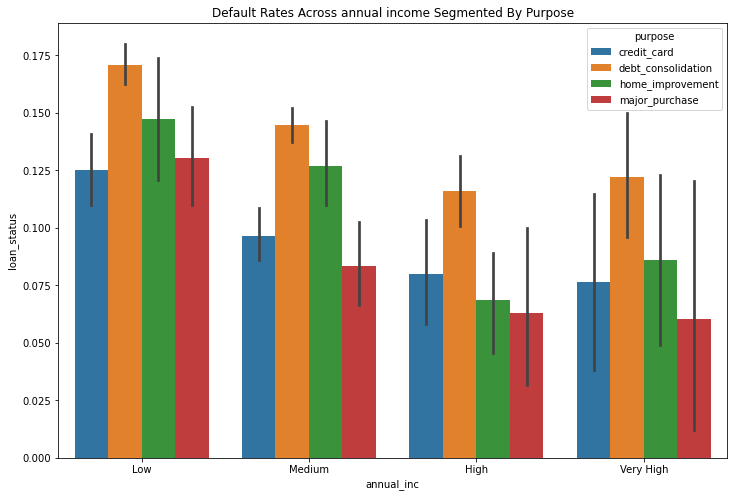

In [1117]:
# ploting default rates across debt to annual income segmented by purpose.
plt.figure(figsize=(12,8))
plt.title("Default Rates Across annual income Segmented By Purpose")
sns.barplot(data=loan_data, x='annual_inc', y='loan_status', hue="purpose")
plt.show()